In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

## Plots for statistics: OLS, Lasso, Ridge, OLS_Lasso, OLS_Ridge, Lasso_Ridge

In [2]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = (x_1 * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    if model == 1:
        ols = sm.OLS(y, X).fit()
        return ols
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return lasso
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ridge
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return ols, lasso
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ols, ridge
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return lasso, ridge

def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    return np.sqrt(len(array))*array.mean()/array.std()
    
# MSE
def setup_test_mse(n, k, a, m, model):
    y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
    X = np.column_stack((x_1, x_2))
    statistic = None
    if model == 1:
        ols = sm.OLS(y, X).fit()
        statistic =  (ols.model.endog-ols.fittedvalues)**2
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        statistic = (lasso.model.endog-lasso.fittedvalues)**2
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        statistic =  (ridge.model.endog-ridge.fittedvalues)**2
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        statistic =  ols_mse - lasso_mse
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = ols_mse - ridge_mse
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = lasso_mse - ridge_mse
    return standardize(statistic)


# Calculate MSEs
def mse(lst, n, i, model):
    lst_cols = ['statistic_' + str(i)]
    df = pd.DataFrame(lst, columns=lst_cols)
    print("Mean:", np.mean(df)[0], "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df)[0])
    return plt.hist(df['statistic_'+str(i)], label='mse_'+str(i),alpha=0.5)


print(setup_test_mse(1000, 1, .1, 1, 1))

22.630775590744037


### Varying values

In [3]:
# Vary number of observations
def vary_obs(model):
    k = 10
    m = 1
    a = 0.1
    n = [100,250,500,1000]
    for i in n: 
        y, x_1, x_2 = gen_data(nobs=i, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(i, k, a, m, model)
            lst.append(results)
        output = mse(lst, i, i, model)
    plt.legend()
    plt.show()

# Vary alpha levels
def vary_alpha(model):
    k = 10
    m = 10
    a = [0,0.1,0.5,1]
    n = 1000
    for i in a: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, i, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, i, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary number of x variables
def vary_xvars(model):
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    for i in k: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, i, a, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [0.1,0.5,1,2]
    a = 0.1
    n = 1000
    for i in m: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=i)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, a, i, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()    
    
def params_scatter(model):
    single_models = [1,2,3]
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    if model in single_models:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            plt.scatter(range(len(x.params)), x.params, label=i)
        plt.legend()
        plt.show()
    else:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            for j in list(setup_test_params(y, x_1, x_2, a, model)):
                plt.scatter(range(len(j.params)), j.params)
        plt.legend(['model1','model2'])
        plt.show()

Vary Observations
Mean: 7.323064240903644 Median: 7.356284144697405 Mode: [[4.85248634]] Variance: 0.6146451475190982
Mean: 11.333528906902043 Median: 11.353119175514792 Mode: [[8.28320109]] Variance: 0.7357448059388016
Mean: 15.896861776978994 Median: 15.94683189745314 Mode: [[12.82149684]] Variance: 0.7556957769263524
Mean: 22.450599299534588 Median: 22.455303702481707 Mode: [[19.6436354]] Variance: 0.6994413307001254


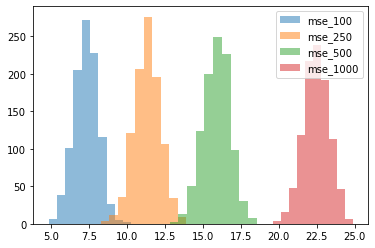

Vary Alpha Levels
Mean: 22.40155097818996 Median: 22.415821895910856 Mode: [[18.76032251]] Variance: 0.76231992148103
Mean: 22.4545336335261 Median: 22.45895674017244 Mode: [[19.48782078]] Variance: 0.7323012009611647
Mean: 22.441238381887125 Median: 22.4555191432694 Mode: [[19.94065569]] Variance: 0.6915607684798094
Mean: 22.397560405043066 Median: 22.42211797157963 Mode: [[19.41943005]] Variance: 0.7664774134261731


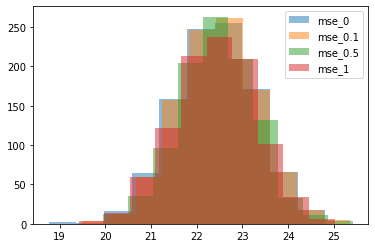

Vary Multiplicative Factors
Mean: 22.43572762827056 Median: 22.43949526411751 Mode: [[19.23479377]] Variance: 0.7458303176250766
Mean: 22.442766304095738 Median: 22.457442844091762 Mode: [[19.78773641]] Variance: 0.6974624870651933
Mean: 22.397237996277212 Median: 22.39226529277086 Mode: [[19.1928726]] Variance: 0.7195628485640859
Mean: 22.46378446550957 Median: 22.44502077781848 Mode: [[19.54926222]] Variance: 0.714147163006882


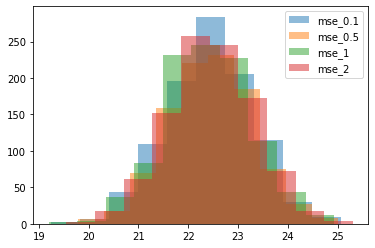

Vary X Variables
Mean: 22.466502277947512 Median: 22.473422471305682 Mode: [[19.18136675]] Variance: 0.7347995370854674
Mean: 22.430360854405247 Median: 22.41387242368372 Mode: [[19.33818214]] Variance: 0.7489432153793825
Mean: 22.42083269317415 Median: 22.410791182588323 Mode: [[19.47320331]] Variance: 0.7199321077295509
Mean: 22.464349741259948 Median: 22.474963496499598 Mode: [[18.86454941]] Variance: 0.7262014203262896


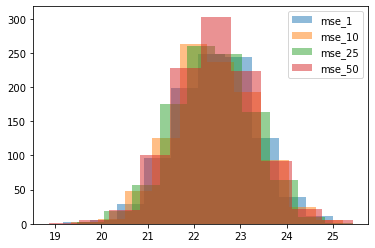

Plot Coefficients


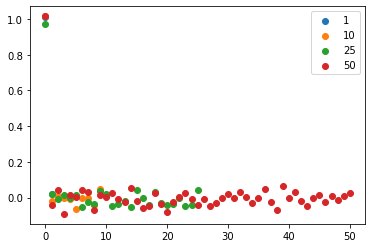

In [4]:
# Model = 1 is OLS
print('Vary Observations')
vary_obs(1)
print('Vary Alpha Levels')
vary_alpha(1)
print('Vary Multiplicative Factors')
vary_multiply(1)
print('Vary X Variables')
vary_xvars(1)
print('Plot Coefficients')
params_scatter(1)

Vary Observations
Mean: 7.315922513150139 Median: 7.29611840324023 Mode: [[4.42335635]] Variance: 0.5939175028008823
Mean: 11.337016072410762 Median: 11.376998230202778 Mode: [[8.68040257]] Variance: 0.6481591498760411
Mean: 15.96713386795308 Median: 15.981252520637259 Mode: [[13.57549646]] Variance: 0.6729438486703959
Mean: 22.428700545261073 Median: 22.432035345871967 Mode: [[19.98131284]] Variance: 0.7058558764885843


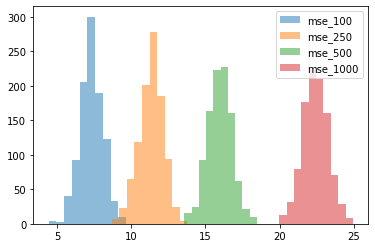

Vary Alpha Levels
Mean: 22.419090219548803 Median: 22.41821903763965 Mode: [[19.11572079]] Variance: 0.7627326969995324
Mean: 22.431713221541408 Median: 22.399229500810982 Mode: [[19.78706796]] Variance: 0.6842910392383822
Mean: 22.43888164807639 Median: 22.41155284021003 Mode: [[19.51761397]] Variance: 0.6960293100561035
Mean: 22.437220837352047 Median: 22.456776202702958 Mode: [[19.68943284]] Variance: 0.6902032375979124


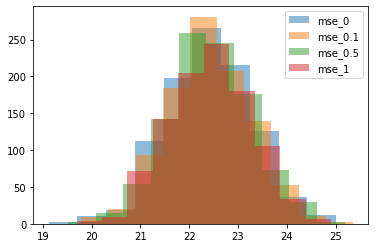

Vary Multiplicative Factors
Mean: 22.455681805877123 Median: 22.50404554326638 Mode: [[19.48138293]] Variance: 0.7114866147466636
Mean: 22.46088901749564 Median: 22.457494909938745 Mode: [[19.68441299]] Variance: 0.7855821113905838
Mean: 22.486360070214317 Median: 22.532868778273524 Mode: [[19.86458278]] Variance: 0.7185818050950709
Mean: 22.45034021206304 Median: 22.42448717492657 Mode: [[19.62299569]] Variance: 0.7176913875634967


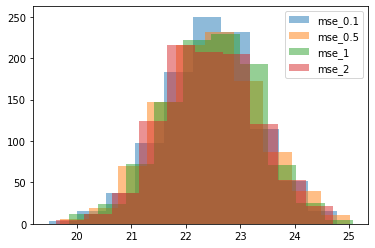

Vary X Variables
Mean: 22.400806383441736 Median: 22.405389368892045 Mode: [[19.56375661]] Variance: 0.743346770337132
Mean: 22.41914357032095 Median: 22.435930111538354 Mode: [[19.41568619]] Variance: 0.7300290070084514
Mean: 22.458203481353582 Median: 22.48564587985826 Mode: [[19.63766742]] Variance: 0.6823072888844989
Mean: 22.436494044735635 Median: 22.439560729184915 Mode: [[19.25490553]] Variance: 0.7410360317796942


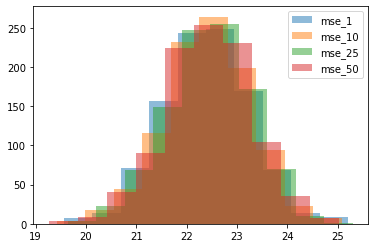

Plot Coefficients


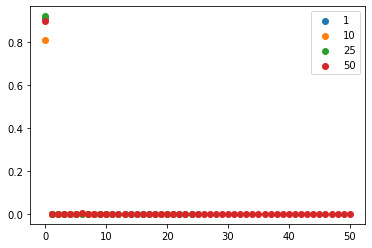

In [5]:
# Model = 2 is Lasso
print('Vary Observations')
vary_obs(2)
print('Vary Alpha Levels')
vary_alpha(2)
print('Vary Multiplicative Factors')
vary_multiply(2)
print('Vary X Variables')
vary_xvars(2)
print('Plot Coefficients')
params_scatter(2)

Vary Observations
Mean: 7.326902172525084 Median: 7.313835706552989 Mode: [[4.86334089]] Variance: 0.6723427303657049
Mean: 11.365501233424418 Median: 11.381532790414568 Mode: [[8.73792891]] Variance: 0.6818594021190999
Mean: 15.933081985828931 Median: 15.947684608957893 Mode: [[12.51721929]] Variance: 0.7136310525561739
Mean: 22.440751778192084 Median: 22.497337651565765 Mode: [[19.41944349]] Variance: 0.760448234942461


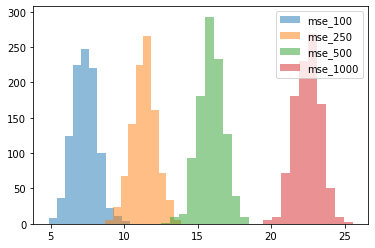

Vary Alpha Levels
Mean: 22.459547020858242 Median: 22.481995543085286 Mode: [[19.09581448]] Variance: 0.7286693569942443
Mean: 22.4197372972501 Median: 22.40962307713506 Mode: [[19.62823319]] Variance: 0.7449442077401494
Mean: 22.460972309582587 Median: 22.45833745696156 Mode: [[19.66549828]] Variance: 0.6937962203251636
Mean: 22.420066080045377 Median: 22.46523682258956 Mode: [[19.47494755]] Variance: 0.6945924859508814


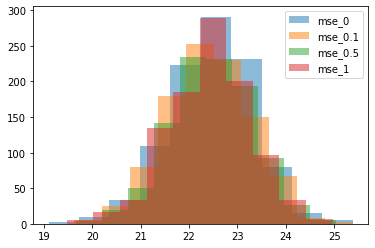

Vary Multiplicative Factors
Mean: 22.44066037207911 Median: 22.46388180036773 Mode: [[19.17191351]] Variance: 0.711598106542931
Mean: 22.438728218169615 Median: 22.451536671497976 Mode: [[19.41737754]] Variance: 0.6971007227290782
Mean: 22.45719374405099 Median: 22.460874056413154 Mode: [[19.85071857]] Variance: 0.6917861307485073
Mean: 22.458469119929656 Median: 22.521976240288588 Mode: [[19.6068765]] Variance: 0.7573944216691425


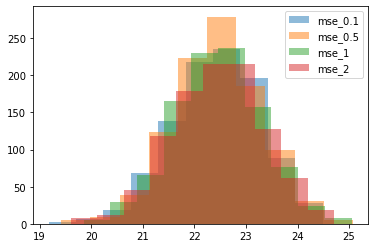

Vary X Variables
Mean: 22.457191232622023 Median: 22.480378104369795 Mode: [[19.67437038]] Variance: 0.7205151702817821
Mean: 22.44531421809401 Median: 22.44425800951208 Mode: [[19.52465237]] Variance: 0.7668823595251464
Mean: 22.386749692685804 Median: 22.40408098824713 Mode: [[19.42023683]] Variance: 0.7594833147063254
Mean: 22.41790072692138 Median: 22.451431735992973 Mode: [[19.33925916]] Variance: 0.7675694449472431


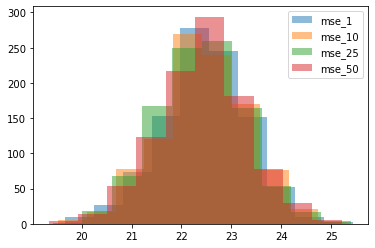

Plot Coefficients


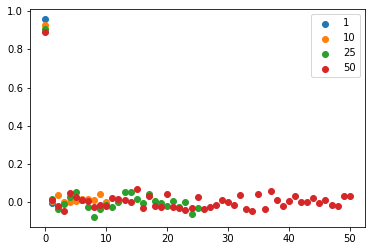

In [6]:
# Model = 3 is Ridge
print('Vary Observations')
vary_obs(3)
print('Vary Alpha Levels')
vary_alpha(3)
print('Vary Multiplicative Factors')
vary_multiply(3)
print('Vary X Variables')
vary_xvars(3)
print('Plot Coefficients')
params_scatter(3)

Vary Observations
Mean: -1.3591709485372676 Median: -1.3409521684065884 Mode: [[-2.37223603]] Variance: 0.05267075853969181
Mean: -1.6582033221998458 Median: -1.6514664026507582 Mode: [[-2.4705958]] Variance: 0.06358164525920983
Mean: -1.897114586857265 Median: -1.887894211826123 Mode: [[-2.78977061]] Variance: 0.07112580829370485
Mean: -2.2249305783814215 Median: -2.20429408928534 Mode: [[-3.05808859]] Variance: 0.06084289468135634


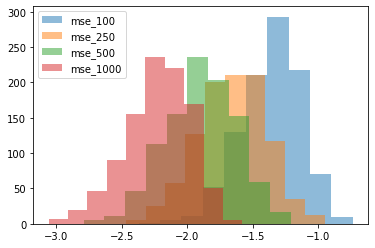

Vary Alpha Levels
Mean: -0.00016160200252641834 Median: 6.291508285402319e-06 Mode: [[-0.09303374]] Variance: 4.957175340518225e-05
Mean: -2.2205618883169533 Median: -2.1934069989729146 Mode: [[-3.23843184]] Variance: 0.06518324541346783
Mean: -7.639295866538178 Median: -7.613648069730578 Mode: [[-9.13889064]] Variance: 0.12336159836144049
Mean: -13.020298769908823 Median: -12.996544414617318 Mode: [[-14.89041337]] Variance: 0.29187016007558253


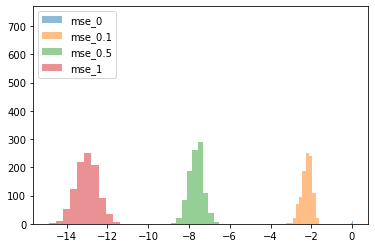

Vary Multiplicative Factors
Mean: -2.1242644532476254 Median: -2.1170891406959207 Mode: [[-3.15150945]] Variance: 0.10337718561027885
Mean: -2.2348705692431468 Median: -2.2149313903324197 Mode: [[-3.09295712]] Variance: 0.0624887496955277
Mean: -2.240642982474651 Median: -2.214129889205597 Mode: [[-3.2187292]] Variance: 0.06869636760758992
Mean: -2.2275100722574517 Median: -2.2080717068616877 Mode: [[-3.00272415]] Variance: 0.05674530889292454


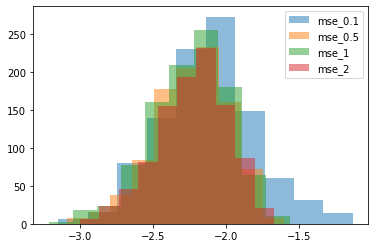

Vary X Variables
Mean: -1.6600377632189183 Median: -1.6346162132703403 Mode: [[-2.26411488]] Variance: 0.01719285456946094
Mean: -2.2304314278859394 Median: -2.217845794900735 Mode: [[-3.24674773]] Variance: 0.05905954985379972
Mean: -2.95931392706685 Median: -2.9356561402453867 Mode: [[-4.04120876]] Variance: 0.09302623595911354
Mean: -3.8969789329200175 Median: -3.884234920514363 Mode: [[-5.17501989]] Variance: 0.11787168719824961


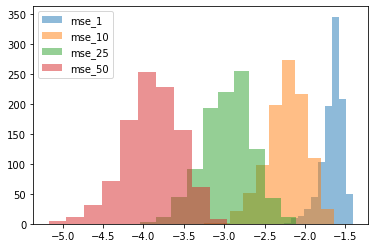

In [7]:
# Model = 4 is OlS - Lasso
print('Vary Observations')
vary_obs(4)
print('Vary Alpha Levels')
vary_alpha(4)
print('Vary Multiplicative Factors')
vary_multiply(4)
print('Vary X Variables')
vary_xvars(4)

Vary Observations
Mean: -0.5436066929073929 Median: -0.538015527573859 Mode: [[-0.8776359]] Variance: 0.008618150733602345
Mean: -0.7707146539043674 Median: -0.7662659416242679 Mode: [[-1.06763873]] Variance: 0.006643857558703221
Mean: -1.0502950098246522 Median: -1.0469114240204513 Mode: [[-1.32411899]] Variance: 0.006582879931307741
Mean: -1.458363286887208 Median: -1.4587031866608717 Mode: [[-1.72216309]] Variance: 0.006058436362523659


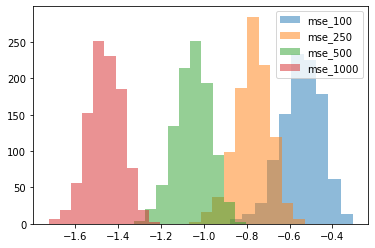

Vary Alpha Levels
Mean: 0.011043430086228113 Median: 0.019361473558865402 Mode: [[-1.568721]] Variance: 0.22250492978701
Mean: -12.229168349196623 Median: -12.208511972917155 Mode: [[-13.75171275]] Variance: 0.23381217870609936
Mean: -20.6658270954647 Median: -20.71491139458235 Mode: [[-22.98091232]] Variance: 0.609833246416527
Mean: -21.569359540110366 Median: -21.613253115748023 Mode: [[-24.46115572]] Variance: 0.6416883575789059


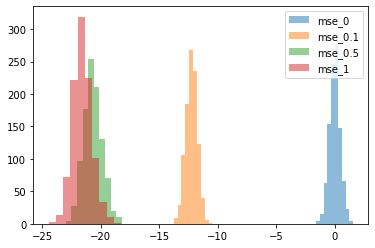

Vary Multiplicative Factors
Mean: -0.20799956457325455 Median: -0.20447969626740897 Mode: [[-0.34144217]] Variance: 0.0016997955067690014
Mean: -0.741185492495965 Median: -0.7403391222057202 Mode: [[-0.91207745]] Variance: 0.0031896296932313177
Mean: -1.460027598077959 Median: -1.4583690505967244 Mode: [[-1.76776986]] Variance: 0.006077079737934602
Mean: -2.8967986960997267 Median: -2.898758645972748 Mode: [[-3.32095901]] Variance: 0.01764437080906616


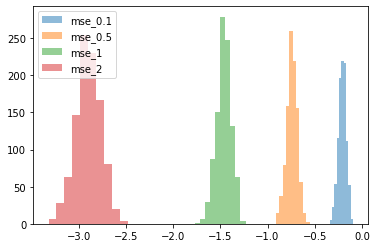

Vary X Variables
Mean: -1.443299583459281 Median: -1.44427172364343 Mode: [[-1.71624974]] Variance: 0.005942821167860758
Mean: -1.4610475825856435 Median: -1.4588244514728899 Mode: [[-1.75390431]] Variance: 0.006456773843214779
Mean: -1.4894723068275355 Median: -1.4866512340606217 Mode: [[-1.75012811]] Variance: 0.006718983379210746
Mean: -1.5466475375667166 Median: -1.5461219396484593 Mode: [[-1.82254321]] Variance: 0.006905826538635628


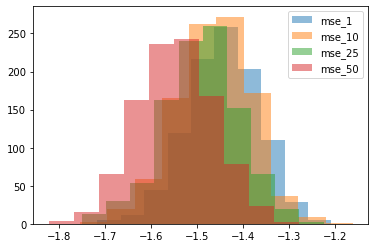

In [8]:
# Model = 5 is OlS - Ridge
print('Vary Observations')
vary_obs(5)
print('Vary Alpha Levels')
vary_alpha(5)
print('Vary Multiplicative Factors')
vary_multiply(5)
print('Vary X Variables')
vary_xvars(5)

Vary Observations
Mean: 1.4070047465749522 Median: 1.3737146565031058 Mode: [[0.60731098]] Variance: 0.07995725720714943
Mean: 1.6164778328523968 Median: 1.6132741561463162 Mode: [[0.70660511]] Variance: 0.0870078025938271
Mean: 1.795862020198955 Median: 1.7955432186685008 Mode: [[0.69359395]] Variance: 0.11304681374452435
Mean: 1.9858288960895079 Median: 1.966277654343676 Mode: [[0.88711257]] Variance: 0.11359400950919514


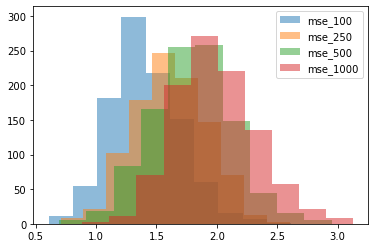

Vary Alpha Levels
Mean: -0.00012425031115460993 Median: -6.57613393062228e-05 Mode: [[-0.03874201]] Variance: 3.823547759947858e-05
Mean: -12.880247641766134 Median: -12.868361425316875 Mode: [[-14.56290037]] Variance: 0.27591550978797796
Mean: -21.0272624285565 Median: -21.043703454563694 Mode: [[-23.71051299]] Variance: 0.7051898916379049
Mean: -21.847180146835356 Median: -21.862829938369423 Mode: [[-24.54541337]] Variance: 0.680981268390761


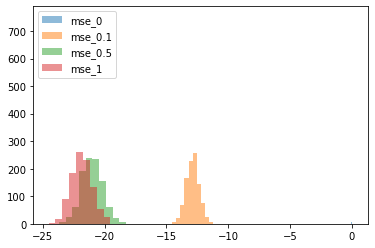

Vary Multiplicative Factors
Mean: 2.3003403397940008 Median: 2.3032071014504645 Mode: [[0.96131379]] Variance: 0.13795275314506025
Mean: 2.6636543614869073 Median: 2.631154939583909 Mode: [[2.12726083]] Variance: 0.06031464161956254
Mean: 1.9740401479577525 Median: 1.9445901775510424 Mode: [[1.09500392]] Variance: 0.11374401042036013
Mean: -1.8402933411644185 Median: -1.8557057989961987 Mode: [[-3.82764375]] Variance: 0.569087032005925


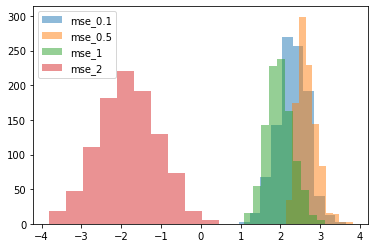

Vary X Variables
Mean: 1.8033609546323073 Median: 1.6586191305036249 Mode: [[0.48423334]] Variance: 0.31333180140924194
Mean: 1.9634666904242795 Median: 1.932616568024352 Mode: [[1.08716743]] Variance: 0.11684409902984061
Mean: 2.8815184271609295 Median: 2.8589959820654105 Mode: [[1.89331103]] Variance: 0.13997180296295447
Mean: 3.9882861391474185 Median: 3.981144487073337 Mode: [[2.39423522]] Variance: 0.15739965675874212


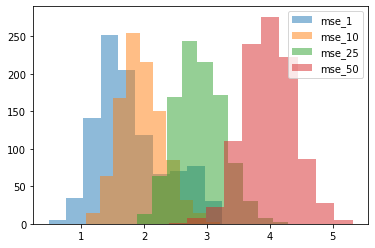

In [9]:
# Model = 6 is Lasso - Ridge
print('Vary Observations')
vary_obs(6)
print('Vary Alpha Levels')
vary_alpha(6)
print('Vary Multiplicative Factors')
vary_multiply(6)
print('Vary X Variables')
vary_xvars(6)